In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scienceplots
import tqdm

plt.style.use(['science', 'grid', 'notebook'])

# Ejercicio 3

Funciones que definen la generacio2n de datos, la arquitectura de la red y el entrenamiento

In [27]:
fun = lambda x: 4*x *(1-x)

def data_generator(n_data_train, n_data_val, n_data_test, f=fun):
    # train
    x_train = np.random.uniform(0,1, n_data_train)
    y_train = f(x_train)
    # validation
    x_val = np.random.uniform(0,1, n_data_val)
    y_val = f(x_val)
    # test
    x_test = np.random.uniform(0,1, n_data_test)
    y_test = f(x_test)

    return (x_train, y_train, x_val, y_val, x_test, y_test)

def begin(input_shape, hidden_dim, activation_hidden, activation_output='linear'):
    inputs = tf.keras.layers.Input(shape=(input_shape,), name='Input')
    hidden = tf.keras.layers.Dense(hidden_dim, activation=activation_hidden)(inputs)
    merge = tf.keras.layers.concatenate([inputs, hidden], axis=-1)
    predictions = tf.keras.layers.Dense(1, activation=activation_output)(merge)

    model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

    print(model.summary())

    return model

def train(model, x_train, y_train, x_val, y_val, x_test, y_test, lr, epochs, batch_size, fun_loss='mse', metrics=['mse'], verbose=True, shuffle=False):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=fun_loss,  # Error cuadrático medio
              metrics=metrics)
    
    
    history=model.fit(x=x_train, y=y_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=shuffle,
                validation_data=(x_val, y_val), verbose=verbose)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)

    y_pred = model.predict(x_test)

    return history, test_loss, test_acc, y_pred

Seteo de constantes y funciones de activación

In [51]:
seed=1                            # for reproducibility 
np.random.seed(seed)
tf.random.set_seed(seed)

# activation_hidden = lambda x: 1/(1+tf.math.exp(-x))
activation_hidden = 'sigmoid'

hidden_dim = 5
input_shape = 1
lr = 0.1

# cantidad de datos para entrenamiento, validation y test
n_train = np.array([5, 10, 100], dtype=np.int64)
n_val = n_train
n_test = 20 * np.ones_like(n_train)

In [52]:
epochs = 500

# Inicializar estructuras para guardar las historias y resultados de prueba
histories = np.empty(len(n_train), dtype=object)
test_losses = np.empty(len(n_train), dtype=object)
test_acc = np.empty(len(n_train), dtype=object)
y_pred = np.empty(len(n_train), dtype=object)
y_trues = np.empty(len(n_train), dtype=object)

# Analizo para diferentes conjuntos de datos
for i, (n_t, n_v, n_tt) in enumerate(zip(n_train, n_val, n_test)):
    data = data_generator(n_t, n_v, n_tt)   # data para el modelo
    model = begin(input_shape, hidden_dim, activation_hidden)
    
    # Entrenar el modelo y guardar la historia y resultados de prueba
    history, test_loss, test_ac, y_p = train(model, *data, lr, epochs, batch_size=n_t//2)
    
    # Almacenar la historia de entrenamiento, la pérdida de prueba y la precisión de prueba
    histories[i] = history
    test_losses[i] = test_loss
    test_acc[i] = test_ac
    y_pred[i] = y_p
    y_trues[i] = data[5]


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 5)         │         10 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_27      │ (None, 6)         │          0 │ Input[0][0],      │
│ (Concatenate)       │                   │            │ dense_54[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 1)         │          7 │ concatenate_27[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.7985 - mse: 0.7985 - val_loss: 0.0734 - val_mse: 0.0734
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2052 - mse: 0.2052 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1470 - mse: 0.1470 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0788 - mse: 0.0788 - val_loss: 0.1794 - val_mse: 0.1794
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1661 - mse: 0.1661 - val_loss: 0.1651 - val_mse: 0.1651
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1377 - mse: 0.1377 - val_loss: 0.0563 - val_mse: 0.0563
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0648 - mse: 0.

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 5)         │         10 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_28      │ (None, 6)         │          0 │ Input[0][0],      │
│ (Concatenate)       │                   │            │ dense_56[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 1)         │          7 │ concatenate_28[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3390 - mse: 0.3390 - val_loss: 0.2614 - val_mse: 0.2614
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2306 - mse: 0.2306 - val_loss: 0.2884 - val_mse: 0.2884
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2159 - mse: 0.2159 - val_loss: 0.1683 - val_mse: 0.1683
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1379 - mse: 0.1379 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1686 - mse: 0.1686 - val_loss: 0.1759 - val_mse: 0.1759
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1710 - mse: 0.1710 - val_loss: 0.1398 - val_mse: 0.1398
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1334 - mse: 0.1334 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1459 - val_mse: 0.1459
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1336 - 

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 5)         │         10 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_29      │ (None, 6)         │          0 │ Input[0][0],      │
│ (Concatenate)       │                   │            │ dense_58[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 1)         │          7 │ concatenate_29[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3560 - mse: 0.3560 - val_loss: 0.1578 - val_mse: 0.1578
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2121 - mse: 0.2121 - val_loss: 0.1877 - val_mse: 0.1877
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1885 - mse: 0.1885 - val_loss: 0.0995 - val_mse: 0.0995
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1042 - mse: 0.1042 - val_loss: 0.1888 - val_mse: 0.1888
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1655 - mse: 0.1655 - val_loss: 0.1788 - val_mse: 0.1788
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1434 - mse: 0.1434 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0989 - mse: 0.0989 - val_loss: 0.1085 - val_mse: 0.1085
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1192 - mse: 0.1192 - val_loss: 0.1209 - val_mse: 0.1209
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1259 - 

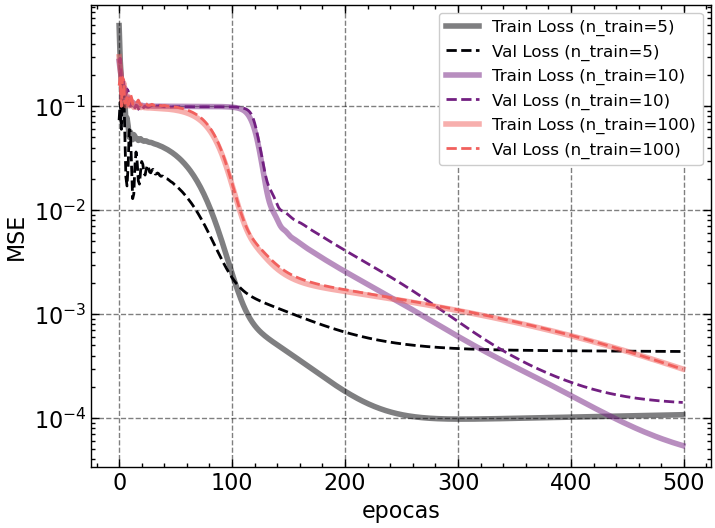

Test losses for n_train=5: 0.016200827434659004
Test accuracies for n_train=5: 0.016200827434659004
Test losses for n_train=10: 0.00010841635230462998
Test accuracies for n_train=10: 0.00010841635230462998
Test losses for n_train=100: 0.00029959605308249593
Test accuracies for n_train=100: 0.00029959605308249593


In [53]:
cm = cm = plt.get_cmap('magma')


for i in range(len(n_train)):
    plt.plot(histories[i].history['loss'], label=f'Train Loss (n_train={n_train[i]})', color=cm(i/len(n_train)), lw=4, alpha=0.5)
    plt.plot(histories[i].history['val_loss'], label=f'Val Loss (n_train={n_train[i]})', linestyle='--', color=cm(i/len(n_train)))

# plt.title('Loss vs Epochs')
plt.xlabel('epocas')
plt.ylabel('MSE')
plt.yscale('log')

plt.legend(fontsize=12)
plt.show()

# Acceso a la precisión de prueba
for i in range(len(n_train)):
    print(f'Test losses for n_train={n_train[i]}: {test_losses[i]}')
    print(f'Test accuracies for n_train={n_train[i]}: {test_acc[i]}')


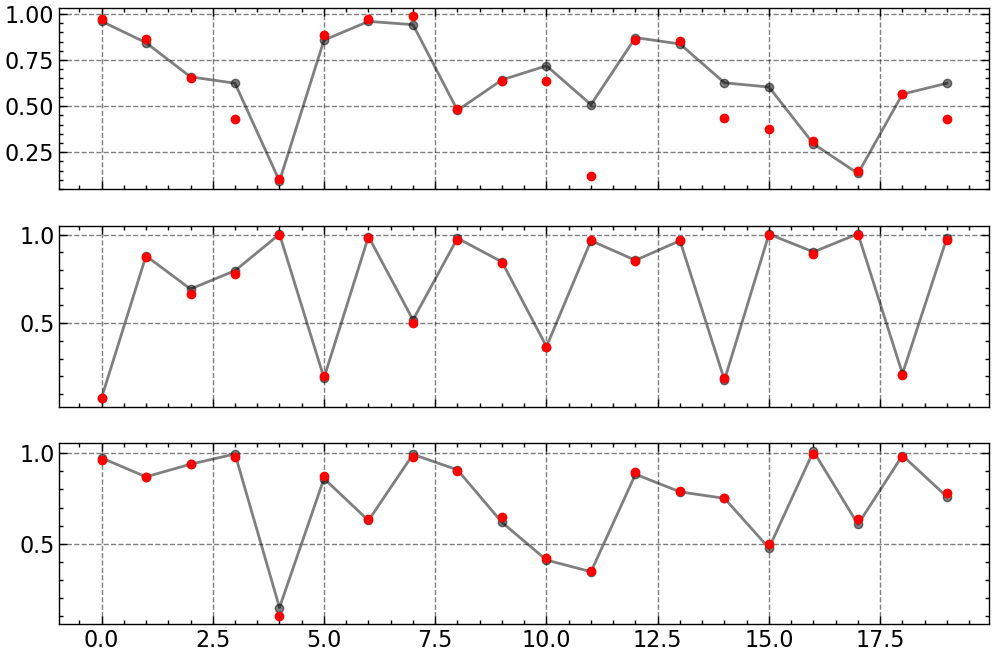

In [55]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

for i in range(len(y_pred)):
    ax[i].plot(y_pred[i], 'o-', color='black', alpha=0.5)
    ax[i].plot(y_trues[i], 'o', color='red')
